In [5]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
import os
os.getcwd()
df = pd.read_csv(r"C:\Users\ANUSHRI\Downloads\bank+marketing\bank\bank.csv", sep=';')

In [11]:
df.shape

(4521, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [13]:
df['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [14]:
X = df.drop('y', axis=1)
y = df['y']

In [16]:
X.shape, y.shape


((4521, 16), (4521,))

In [17]:
print(X)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [18]:
print(y)

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.3+ KB


In [20]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4521 entries, 0 to 4520
Series name: y
Non-Null Count  Dtype 
--------------  ----- 
4521 non-null   object
dtypes: object(1)
memory usage: 35.4+ KB


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
dtypes: int64(16)
memory usage: 565.3 KB


In [23]:
y = le.fit_transform(y)

In [24]:
set(y)

{np.int64(0), np.int64(1)}

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

In [29]:
X_train.shape, X_test.shape

((3616, 16), (905, 16))

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

In [33]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [34]:
y_pred = dt_model.predict(X_test)

In [38]:
y_pred[:10], y_test[:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8983425414364641

as the data is imbalanced, accuracy alone wont help.So we use confusion matrix.

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[781,  26],
       [ 66,  32]])

The model is very good at predicting customers who will not subscribe, but it misses a significant number of customers who actually subscribe.

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.55      0.33      0.41        98

    accuracy                           0.90       905
   macro avg       0.74      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



The classification report provides a detailed evaluation of the model’s performance for both classes.

The decision tree classifier achieved an overall accuracy of 89.8%. The confusion matrix shows that the model performs very well in predicting customers who do not subscribe to the product. However, the model has lower recall for customers who do subscribe, indicating that some potential customers are missed. This behavior is expected due to the imbalance in the dataset, where non-subscribers significantly outnumber subscribers.

<function matplotlib.pyplot.show(close=None, block=None)>

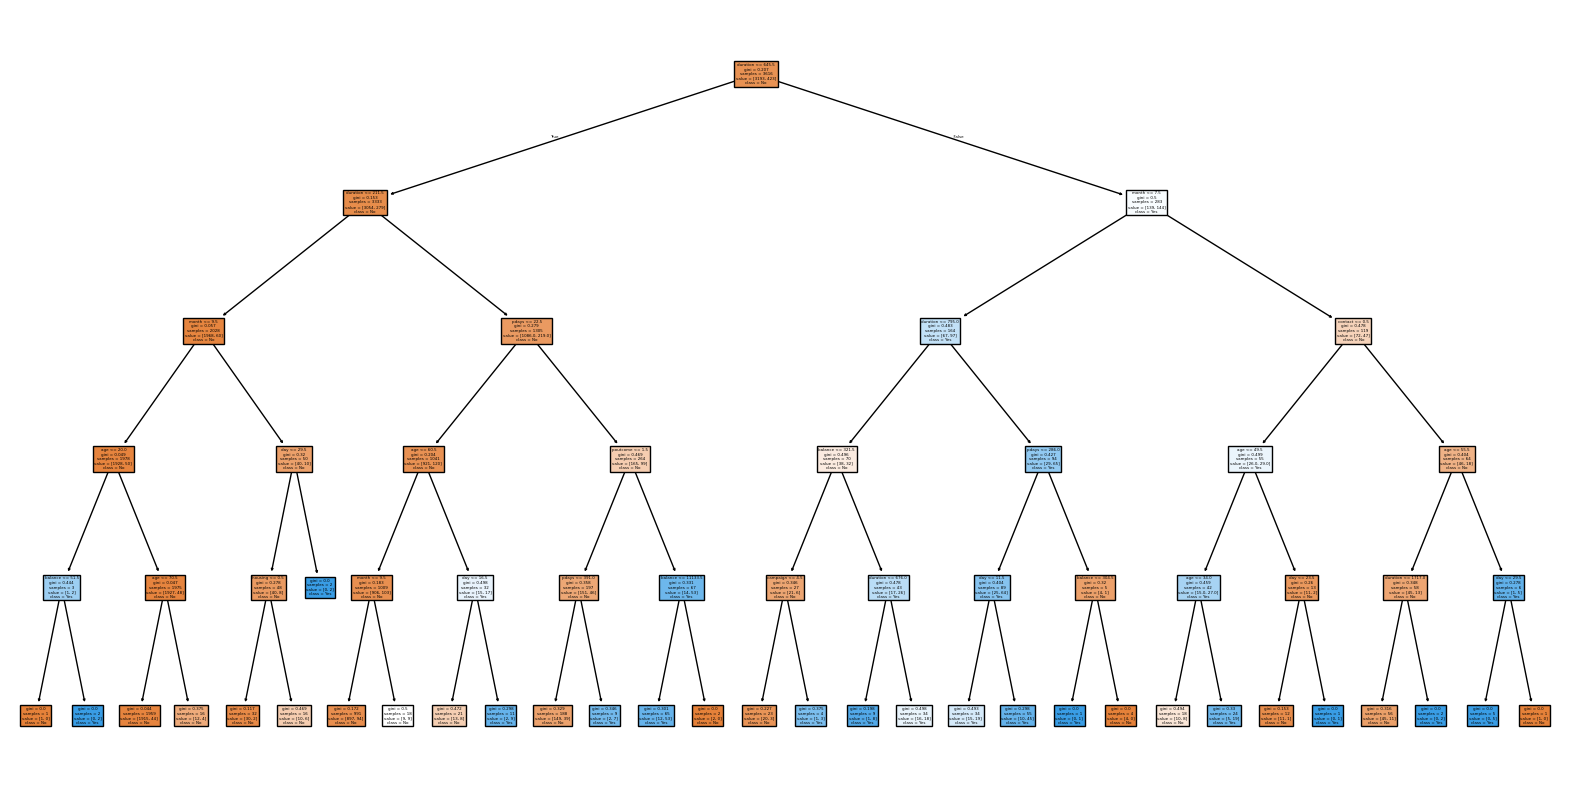

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No','Yes'],
    filled=True
)
plt.savefig("decision_tree.png", bbox_inches='tight')
plt.show